In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

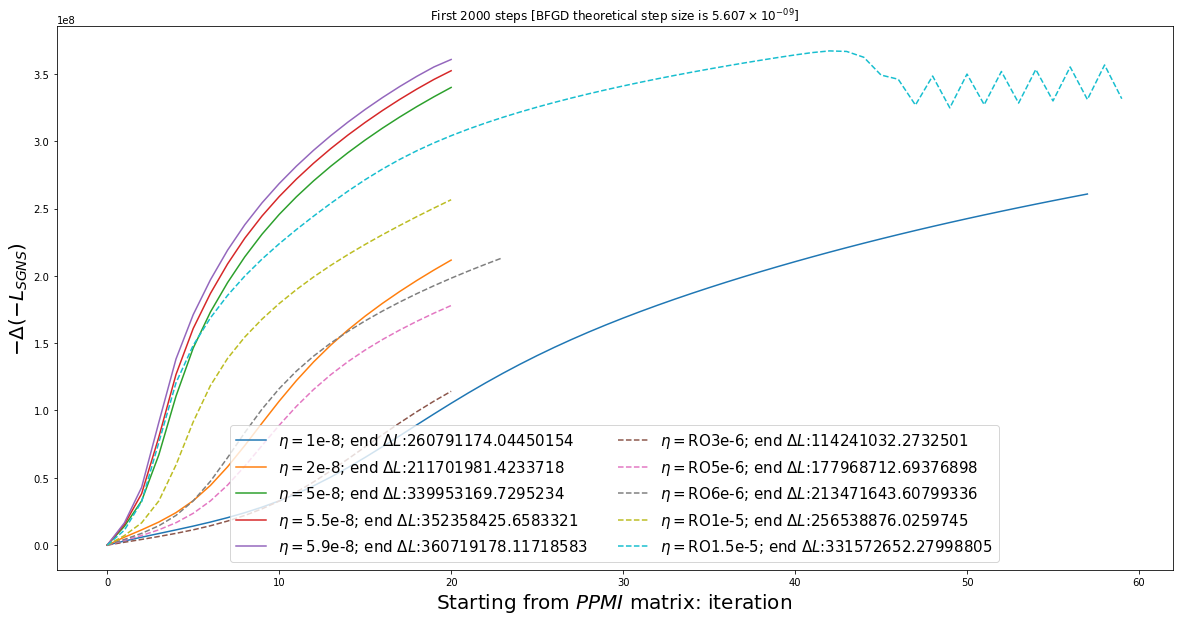

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import re
plt.figure()
start = 0
end = 200

plt.figure(figsize=(20,10))
#init = 1808805.021334937
loglist= [
#'log.2_PMMRO_stp5e-3_reg0.txt',
#'log.2_PMMRO_stp5e-4_reg0.txt',
'log.9_PMM_stp1e-8_reg0.txt',
'log.9_PMM_stp2e-8_reg0.txt',
'log.9_PMM_stp5e-8_reg0.txt',
'log.9_PMM_stp5.5e-8_reg0.txt',
'log.9_PMM_stp5.9e-8_reg0.txt',    
#'log.2_PMM_stp1e-3_reg0.txt',
#'log.2_PMM_stp1e-4_reg0.txt',
#'log.2_PMM_stp2e-5_reg0.txt',
#'log.2_PMM_stp1.5e-5_reg0.txt',
'log.9_ROPMM_stp3e-6_reg0.txt',
'log.9_ROPMM_stp5e-6_reg0.txt',
'log.9_ROPMM_stp6e-6_reg0.txt',
'log.9_ROPMM_stp1e-5_reg0.txt',
'log.9_ROPMM_stp1.5e-5_reg0.txt'
#'log.9_ROPMM_stp2e-5_reg0.txt'
]
with open('log/'+loglist[1]) as file:
    for line in file:
        line = re.sub("[(',)]", '', line)
        if 'Iter'==line.split(' ')[0]:
            init=float(line.split(' ')[4])
            break
            
for log in loglist:
    with open('log/'+log) as file:
        x=[]; y=[]
        for line in file:
            line = re.sub("[(',)]", '', line)
            if 'Iter'==line.split(' ')[0]:
                x.append(int(line.split(' ')[2]))
                y.append(float(line.split(' ')[4]))
        lgd = str(log).split('_')
        if  not -1 == lgd[1].find('RO'):
            try: 
                plt.plot(x[start:end],(init-np.array(y[start:end])), linestyle='--',label='$\eta=$'+'RO'+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[end-1]))
            except:
                plt.plot(x[start:   ],(init-np.array(y[start:   ])), linestyle='--',label='$\eta=$'+'RO'+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[   -1]))
        else:
            try:
                plt.plot(x[start:end],(init-np.array(y[start:end])), label='$\eta=$'+lgd[1][3:]+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[end-1]))
            except:
                plt.plot(x[start:   ],(init-np.array(y[start:   ])), label='$\eta=$'+lgd[1][3:]+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[   -1]))

plt.legend(loc='lower center', fontsize=15,ncol=2)
plt.title('First '+str(end*10)+' steps [BFGD theoretical step size is $5.607\\times 10^{-09}$]')
plt.xlabel('Starting from $PPMI$ matrix: iteration',size=20)
plt.ylabel('$-\Delta(-L_{SGNS})$',size=20) 

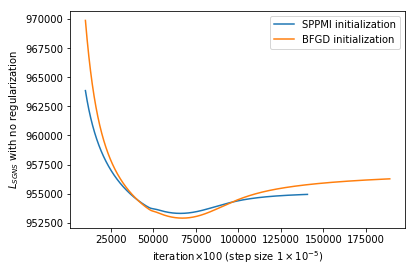

In [5]:
plt.figure()
start = 100
with open('log/log.pmm0-2.txt') as file:
#with open('log.2pmmreg0.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.split(' ')[4]))
    plt.plot(x[start:],y[start:], label='SPPMI initialization')
    
with open('log/log.x0reg0-2.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.split(' ')[4]))
    plt.plot(x[start:],y[start:], label='BFGD initialization')
plt.legend()
plt.xlabel('iteration$\\times 100$ (step size $1\\times10^{-5}$)')
plt.ylabel('$L_{SGNS}$ with no regularization')
plt.savefig('img/initialization')

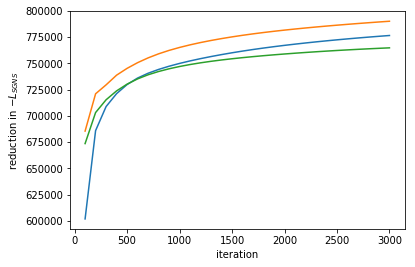

In [3]:
plt.figure()
start = 0
end = 30
init = 1783763.7762035725
#init = 1808805.021334937
loglist= ['log.x0reg0-1.txt','log.x0reg0-2.txt','log.x0reg0-3.txt']
for log in loglist:
    with open('log/'+log) as file:
        x=[]; y=[]
        for line in file:
            if 'Iter'==line.split(' ')[0]:
                x.append(int(line.split(' ')[2]))
                y.append(float(line.split(' ')[4]))
        plt.plot(x[start:end],(init-np.array(y[start:end])), label='step size $1\\times10^{-5}$')
    

plt.xlabel('iteration')
plt.ylabel('reduction in $-L_{SGNS}$')

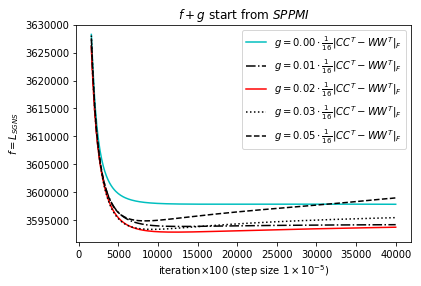

In [4]:
plt.figure()
start = 15
end = 400
with open('log/log.2pmmreg0.00-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'c', label='$g=0.00\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
    
with open('log/log.2pmmreg0.01-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'k-.',label='$g=0.01\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')

with open('log/log.2pmmreg0.02-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'r',label='$g=0.02\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
    
with open('log/log.2pmmreg0.03-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'k:', label='$g=0.03\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
    
with open('log/log.2pmmreg0.05-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'k--',label='$g=0.05\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
plt.legend(loc='best')
plt.title('$f+g$ start from $SPPMI$')
plt.xlabel('iteration$\\times 100$ (step size $1\\times10^{-5}$)')
plt.ylabel('$f=L_{SGNS}$')
plt.savefig('img/regularizationPPM')

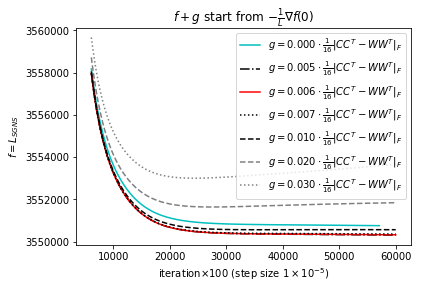

In [5]:
plt.figure()
start = 60
end = 600

with open('log/log.2x0reg0.000-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'c', label='$g=0.000\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
    
with open('log/log.2x0reg0.005-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'k-.',label='$g=0.005\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')

with open('log/log.2x0reg0.006-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'r',label='$g=0.006\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
    
with open('log/log.2x0reg0.007-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'k:', label='$g=0.007\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
with open('log/log.2x0reg0.010-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'k--',label='$g=0.010\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
with open('log/log.2x0reg0.020-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'C7--',label='$g=0.020\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
with open('log/log.2x0reg0.030-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'C7:',label='$g=0.030\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
plt.legend(loc='best')
plt.title('$f+g$ start from $-\\frac{1}{L}\\nabla f(0)$')
plt.xlabel('iteration$\\times 100$ (step size $1\\times10^{-5}$)')
plt.ylabel('$f=L_{SGNS}$')
plt.savefig('img/regularizationX0')

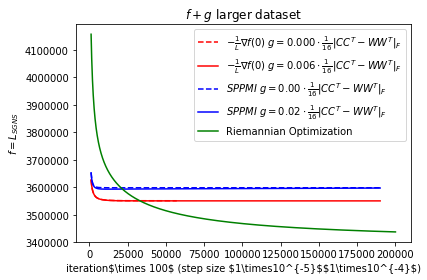

In [9]:
plt.figure()
start = 10
end = 2000
with open('log/log.2x0reg0.000-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'r--', label='$-\\frac{1}{L}\\nabla f(0)$ $g=0.000\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')

with open('log/log.2x0reg0.006-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'r-', label='$-\\frac{1}{L}\\nabla f(0)$ $g=0.006\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')

with open('log/log.2pmmreg0.00-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'b--', label='$SPPMI$ $g=0.00\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')

with open('log/log.2pmmreg0.02-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))
    plt.plot(x[start:end],y[start:end], 'b',label='$SPPMI$ $g=0.02\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
    

with open('log/log.2ro.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[4]))

    plt.plot(x[start:end],y[start:end], 'g',label='Riemannian Optimization')
    
plt.legend(loc='best')
plt.title('$f+g$ larger dataset')
plt.xlabel('iteration$\\times 100$ (step size $1\\times10^{-5}$\$1\\times10^{-4}$)')
plt.ylabel('$f=L_{SGNS}$')
plt.savefig('img/compare')

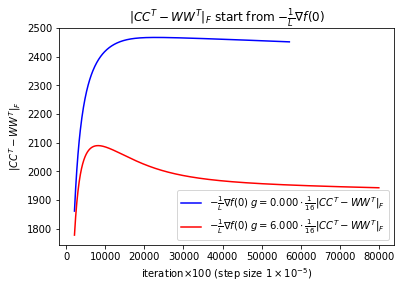

In [11]:
plt.figure()
start = 20
end = 800
with open('log/log.2x0reg0.000-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[5]))
    plt.plot(x[start:end],y[start:end], 'b-', label='$-\\frac{1}{L}\\nabla f(0)$ $g=0.000\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')

with open('log/log.2x0reg0.006-1.txt') as file:
    x=[]; y=[]
    for line in file:
        if 'Iter'==line.split(' ')[0]:
            x.append(int(line.split(' ')[2]))
            y.append(float(line.replace('(','').replace(')','').replace(',','').split(' ')[5]))
    plt.plot(x[start:end],y[start:end], 'r-', label='$-\\frac{1}{L}\\nabla f(0)$ $g=6.000\cdot\\frac{1}{16}\\|CC^T-WW^T\\|_F$')
plt.legend(loc='best')
plt.title('$\\|CC^T-WW^T\\|_F$ start from $-\\frac{1}{L}\\nabla f(0)$')
plt.xlabel('iteration$\\times 100$ (step size $1\\times10^{-5}$)')
plt.ylabel('$\\|CC^T-WW^T\\|_F$')
plt.savefig('img/regularizationEffect')

In [77]:
%%bash
cd  log
ls log.2_*

log.2_PMMRO_stp1e-4_reg0.txt
log.2_PMMRO_stp2e-4_reg0.txt
log.2_PMMRO_stp3.5e-4_reg0.txt
log.2_PMMRO_stp3e-4_reg0.txt
log.2_PMMRO_stp4e-4_reg0.txt
log.2_PMMRO_stp5e-3_reg0.txt
log.2_PMMRO_stp5e-4_reg0.txt
log.2_PMMRO_stp5e-5_reg0.txt
log.2_PMMRO_stp5e-6_reg0.txt
log.2_PMM_stp1.15e-5_reg0.txt
log.2_PMM_stp1.1e-5_reg0.txt
log.2_PMM_stp1.2e-5_reg0.txt
log.2_PMM_stp1.5e-5_reg0.txt
log.2_PMM_stp1e-3_reg0.txt
log.2_PMM_stp1e-4_reg0.txt
log.2_PMM_stp1e-5_reg0.txt
log.2_PMM_stp1e-6_reg0.txt
log.2_PMM_stp1e-7_reg0.txt
log.2_PMM_stp2e-5_reg0.txt
log.2_PMM_stpTh_reg0.txt
log.2_X0_stp1e-3_reg0.txt
log.2_X0_stp1e-4_reg0.txt
log.2_X0_stp1e-5_reg0.txt
log.2_X0_stp1e-6_reg0.txt
log.2_X0_stp1e-7_reg0.txt
log.2_X0_stp2e-5_reg0.txt
log.2_X0_stpTh_reg0.txt


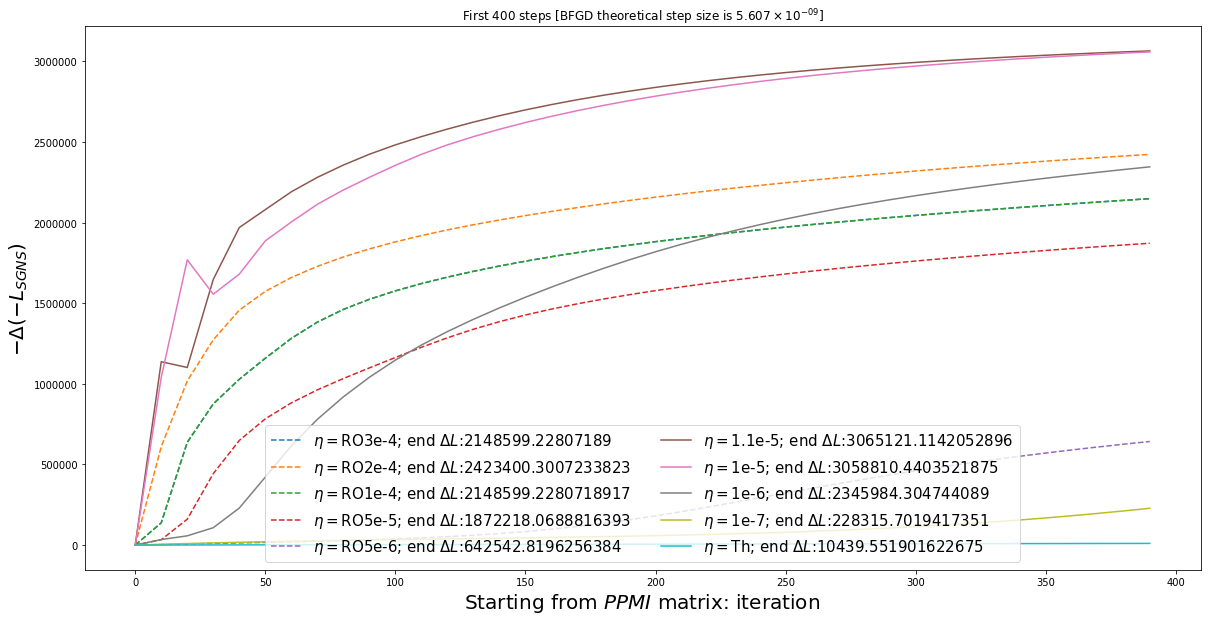

In [16]:

plt.figure()
start = 0
end = 40
init = 7809426.9624207867

plt.figure(figsize=(20,10))
#init = 1808805.021334937

loglist= [
#'log.2_PMMRO_stp5e-3_reg0.txt',
#'log.2_PMMRO_stp5e-4_reg0.txt',
#'log.2_PMMRO_stp4e-4_reg0.txt',
#'log.2_PMMRO_stp3.5e-4_reg0.txt',
'log.2_PMMRO_stp3e-4_reg0.txt',
'log.2_PMMRO_stp2e-4_reg0.txt',
'log.2_PMMRO_stp1e-4_reg0.txt',
'log.2_PMMRO_stp5e-5_reg0.txt',
'log.2_PMMRO_stp5e-6_reg0.txt',
    
#'log.2_PMM_stp1e-3_reg0.txt',
#'log.2_PMM_stp1e-4_reg0.txt',
#'log.2_PMM_stp2e-5_reg0.txt',
#'log.2_PMM_stp1.5e-5_reg0.txt',
#'log.2_PMM_stp1.2e-5_reg0.txt',
#'log.2_PMM_stp1.15e-5_reg0.txt',
'log.2_PMM_stp1.1e-5_reg0.txt',
'log.2_PMM_stp1e-5_reg0.txt',
'log.2_PMM_stp1e-6_reg0.txt',
'log.2_PMM_stp1e-7_reg0.txt',
'log.2_PMM_stpTh_reg0.txt'
]
for log in loglist:
    with open('log/'+log) as file:
        x=[]; y=[]
        for line in file:
            if 'Iter'==line.split(' ')[0]:
                x.append(int(line.split(' ')[2]))
                y.append(float(line.split(' ')[4][1:-1]))
        lgd = str(log).split('_')
        if 'O'==lgd[1][-1]:
            plt.plot(x[start:end],(init-np.array(y[start:end])), linestyle='--',label='$\eta=$'+lgd[1][3:]+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[end-1]))
        else:
            plt.plot(x[start:end],(init-np.array(y[start:end])), label='$\eta=$'+lgd[1][3:]+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[end-1]))
  
plt.legend(loc='lower center', fontsize=15,ncol=2)
plt.title('First '+str(end*10)+' steps [BFGD theoretical step size is $5.607\\times 10^{-09}$]')
plt.xlabel('Starting from $PPMI$ matrix: iteration',size=20)
plt.ylabel('$-\Delta(-L_{SGNS})$',size=20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


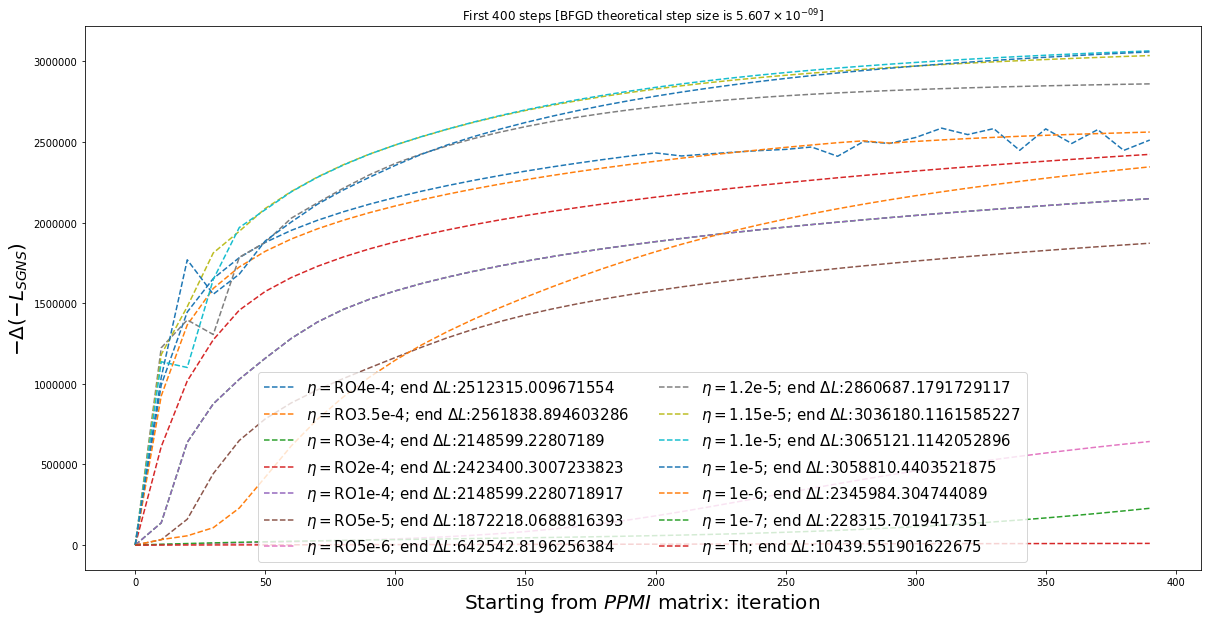

In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import re
plt.figure()
start = 0
end = 40
init = 7809426.9624207867

plt.figure(figsize=(20,10))
#init = 1808805.021334937
loglist= [
#'log.2_PMMRO_stp5e-3_reg0.txt',
#'log.2_PMMRO_stp5e-4_reg0.txt',
'log.2_PMMRO_stp4e-4_reg0.txt',
'log.2_PMMRO_stp3.5e-4_reg0.txt',
'log.2_PMMRO_stp3e-4_reg0.txt',
'log.2_PMMRO_stp2e-4_reg0.txt',
'log.2_PMMRO_stp1e-4_reg0.txt',
'log.2_PMMRO_stp5e-5_reg0.txt',
'log.2_PMMRO_stp5e-6_reg0.txt',
    
#'log.2_PMM_stp1e-3_reg0.txt',
#'log.2_PMM_stp1e-4_reg0.txt',
#'log.2_PMM_stp2e-5_reg0.txt',
#'log.2_PMM_stp1.5e-5_reg0.txt',
'log.2_PMM_stp1.2e-5_reg0.txt',
'log.2_PMM_stp1.15e-5_reg0.txt',
'log.2_PMM_stp1.1e-5_reg0.txt',
'log.2_PMM_stp1e-5_reg0.txt',
'log.2_PMM_stp1e-6_reg0.txt',
'log.2_PMM_stp1e-7_reg0.txt',
'log.2_PMM_stpTh_reg0.txt'
]
for log in loglist:
    with open('log/'+log) as file:
        x=[]; y=[]
        for line in file:
            line = re.sub("[(,)]", '', line)
            if 'Iter'==line.split(' ')[0]:
                x.append(int(line.split(' ')[2]))
                y.append(float(line.split(' ')[4]))
        lgd = str(log).split('_')
        if  lgd[1].find('RO'):
            plt.plot(x[start:end],(init-np.array(y[start:end])), linestyle='--',label='$\eta=$'+lgd[1][3:]+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[end-1]))
        else:
            plt.plot(x[start:end],(init-np.array(y[start:end])), label='$\eta=$'+lgd[1][3:]+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[end-1]))
    
plt.legend(loc='lower center', fontsize=15,ncol=2)
plt.title('First '+str(end*10)+' steps [BFGD theoretical step size is $5.607\\times 10^{-09}$]')
plt.xlabel('Starting from $PPMI$ matrix: iteration',size=20)
plt.ylabel('$-\Delta(-L_{SGNS})$',size=20)

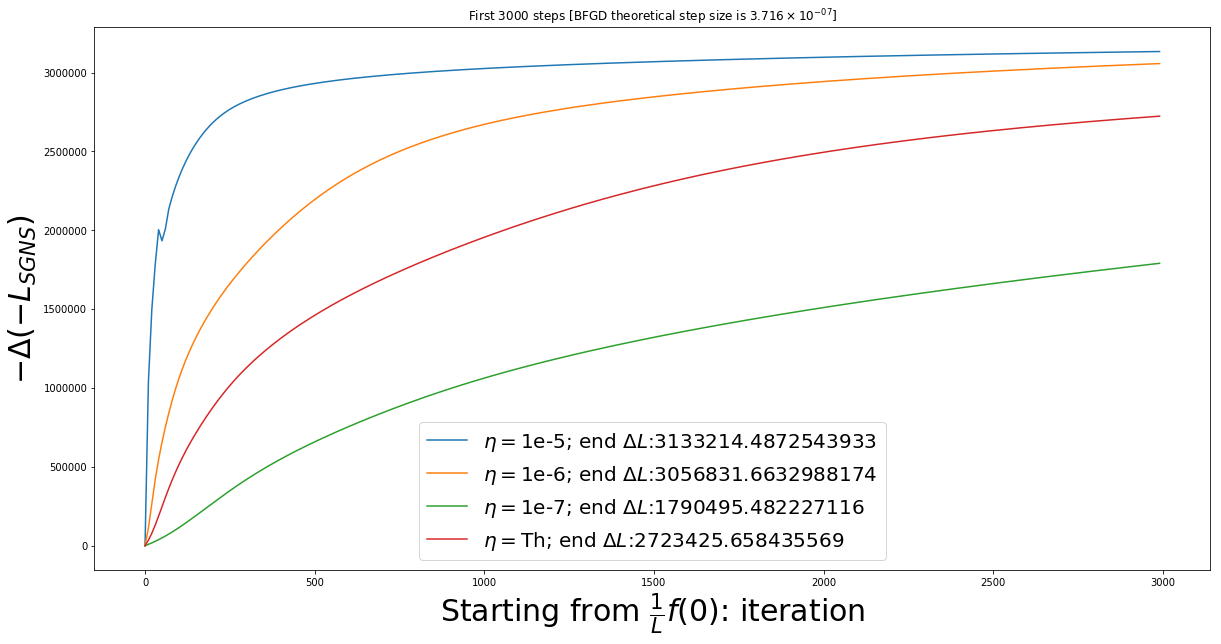

In [175]:
plt.figure()
start = 0
end = 300
init = 7714678.744545651

plt.figure(figsize=(20,10))

#init = 1808805.021334937
loglist= [#'log.2_X0_stp1e-3_reg0.txt',
#'log.2_X0_stp1e-4_reg0.txt',
#'log.2_X0_stp2e-5_reg0.txt',
'log.2_X0_stp1e-5_reg0.txt',
'log.2_X0_stp1e-6_reg0.txt',
'log.2_X0_stp1e-7_reg0.txt',
'log.2_X0_stpTh_reg0.txt']
for log in loglist:
    with open('log/'+log) as file:
        x=[]; y=[]
        for line in file:
            if 'Iter'==line.split(' ')[0]:
                x.append(int(line.split(' ')[2]))
                y.append(float(line.split(' ')[4][1:-1]))
        lgd = str(log).split('_')
        if 'O'==lgd[1][-1]:
            plt.plot(x[start:end],(init-np.array(y[start:end])), linestyle='--',label='$\eta=$'+lgd[1][3:]+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[end-1]))
        else:
            plt.plot(x[start:end],(init-np.array(y[start:end])), label='$\eta=$'+lgd[1][3:]+lgd[2][3:]+'; end $\Delta L$:'+str(init-y[end-1]))
      

plt.legend(loc='lower center', fontsize=20)
plt.title('First '+str(end*10)+' steps [BFGD theoretical step size is $3.716\\times 10^{-07}$]')
plt.xlabel('Starting from $\\frac{1}{L}f(0)$: iteration',size=30)
plt.ylabel('$-\\Delta(-L_{SGNS})$', size=30)